# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mpl # We'll use the matplotlib.colors library to color our data points
%matplotlib inline

In [2]:
df = pd.read_csv("oh_table.csv")

In [4]:
df.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


In [5]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df

,column 1,column 2
0,20,0
1,50,1
2,15,1
3,50,1
4,65,0
5,50,0
6,10,1


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Follow along with the live coding activity to see how this works.

In [11]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0
zeros = sample_df["column 1"].loc[sample_df["column 2"]== 0]
zeros

0    20
4    65
5    50
Name: column 1, dtype: int64

In [14]:
sample_df20 = sample_df.loc[sample_df["column 1"]<30]
sample_df20

,column 1,column 2
0,20,0
2,15,1
6,10,1


Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

In [9]:
sample_df["column 1"].loc[sample_df["column 2"]== 1]

1    50
2    15
3    50
6    10
Name: column 1, dtype: int64

Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

In [10]:
sample_df["column 2"].loc[sample_df["column 1"]== 50]

1    1
3    1
5    0
Name: column 2, dtype: int64

In [31]:
df3= df.loc[df["group_id"]== 2]
df3.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size,absolute magnitude
276,38,46975431705914112,HIP 19504,62.677046,18.423125,21.3141,46.969,6.477,5.795,NaN,NaN,NaN,2,118,3.117943
277,1359,38354676428572288,HIP 18322,58.756565,12.485544,21.8224,45.847,9.676,8.181,NaN,NaN,NaN,2,118,6.369445
278,1438,315377867997367936,HIP 6978,22.465132,31.007339,23.0783,43.348,7.705,6.682,NaN,NaN,NaN,2,118,4.520155
279,1615,43538289638888064,HIP 18327,58.777732,16.998376,24.6359,40.605,8.674,7.413,NaN,NaN,NaN,2,118,5.631102
280,1624,43789768566924416,HIP 17962,57.604583,17.246416,21.0262,47.675,9.126,7.776,NaN,NaN,NaN,2,118,5.734546


#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [21]:
# You will need to import numpy
import numpy as np

In [32]:
# You can use this function in your code to find the log of distance:
df3["absolute magnitude"]= df3["G"]-5 * np.log10(df3["distance"]) + 5
#np.log10(df["distance"]) 
df3.head()

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size,absolute magnitude
276,38,46975431705914112,HIP 19504,62.677046,18.423125,21.3141,46.969,6.477,5.795,NaN,NaN,NaN,2,118,3.117943
277,1359,38354676428572288,HIP 18322,58.756565,12.485544,21.8224,45.847,9.676,8.181,NaN,NaN,NaN,2,118,6.369445
278,1438,315377867997367936,HIP 6978,22.465132,31.007339,23.0783,43.348,7.705,6.682,NaN,NaN,NaN,2,118,4.520155
279,1615,43538289638888064,HIP 18327,58.777732,16.998376,24.6359,40.605,8.674,7.413,NaN,NaN,NaN,2,118,5.631102
280,1624,43789768566924416,HIP 17962,57.604583,17.246416,21.0262,47.675,9.126,7.776,NaN,NaN,NaN,2,118,5.734546


In [39]:
len(df3)

118

### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

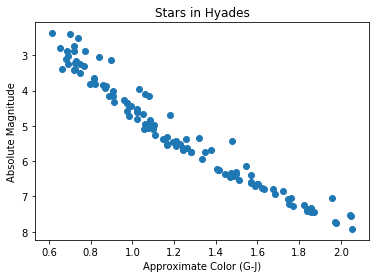

In [58]:
plt.scatter(df3["G"]-df3["J"], df3["absolute magnitude"])
plt.xlabel("Approximate Color (G-J)")
plt.ylabel("Absolute Magnitude")
plt.title("Stars in Hyades")
plt.gca().invert_yaxis()

### Coding Challenge 1: Add the sun to your color magnitude diagram

### Coding Challenge 2: Add a colormap to your diagram

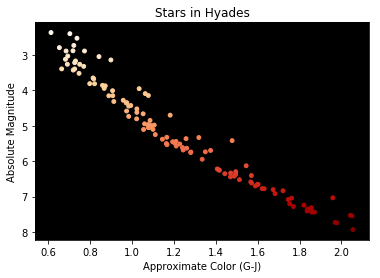

In [93]:
cm = plt.cm.get_cmap("OrRd") 
plt.scatter(df3["G"]-df3["J"], df3["absolute magnitude"], c= df3["absolute magnitude"],cmap=cm, s=15)
plt.xlabel("Approximate Color (G-J)")
plt.ylabel("Absolute Magnitude")
plt.title("Stars in Hyades")
plt.gca().invert_yaxis()
ax = plt.gca()
ax.set_facecolor('xkcd:black')

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

Text(0.5, 1.0, 'Absolute Magnitude of Stars in Hyades')

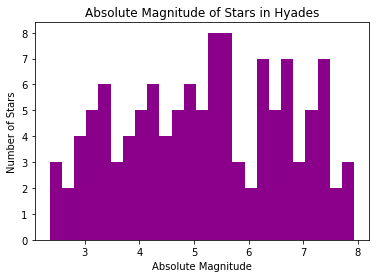

In [91]:
plt.hist(df3["absolute magnitude"], 25, color = "darkmagenta")
plt.xlabel("Absolute Magnitude")
plt.ylabel("Number of Stars")
plt.title("Absolute Magnitude of Stars in Hyades")